In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
import os
os.chdir(r"C:\Users\aliza\Desktop\AI_and_CV_Projects\Calibration_Camera")
print("Current Directory:", os.getcwd())


Current Directory: C:\Users\aliza\Desktop\AI_and_CV_Projects\Calibration_Camera


In [5]:
print(os.listdir())


['Calibration.ipynb', 'test_image.png', 'wide_dist_pickle.p']


Loaded 35 object points and 35 image points.


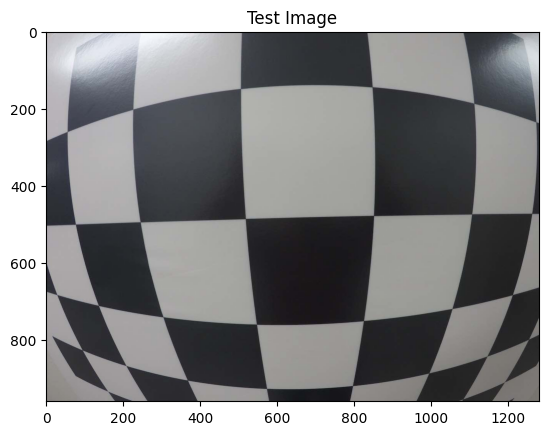

In [6]:
import pickle
import cv2
import matplotlib.pyplot as plt

# Load the saved object points and image points
with open("wide_dist_pickle.p", "rb") as file:
    dist_pickle = pickle.load(file)

objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

print(f"Loaded {len(objpoints)} object points and {len(imgpoints)} image points.")

# Load and display the test image
img = cv2.imread("test_image.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display in Matplotlib
plt.title("Test Image")
plt.show()


Camera Matrix:
[[ fx   0  cx ]
 [  0  fy  cy ]
 [  0   0   1 ]]

Distortion Coefficients:
[ k1 k2 p1 p2 k3 ]


In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


print("Camera Matrix:\n", mtx)
print("\nDistortion Coefficients:\n", dist)


Camera Matrix:
 [[560.33468243   0.         651.26269237]
 [  0.         561.37973145 499.06652492]
 [  0.           0.           1.        ]]

Distortion Coefficients:
 [[-2.32951777e-01  6.17256346e-02 -1.83274571e-05  3.39255772e-05
  -7.54987702e-03]]


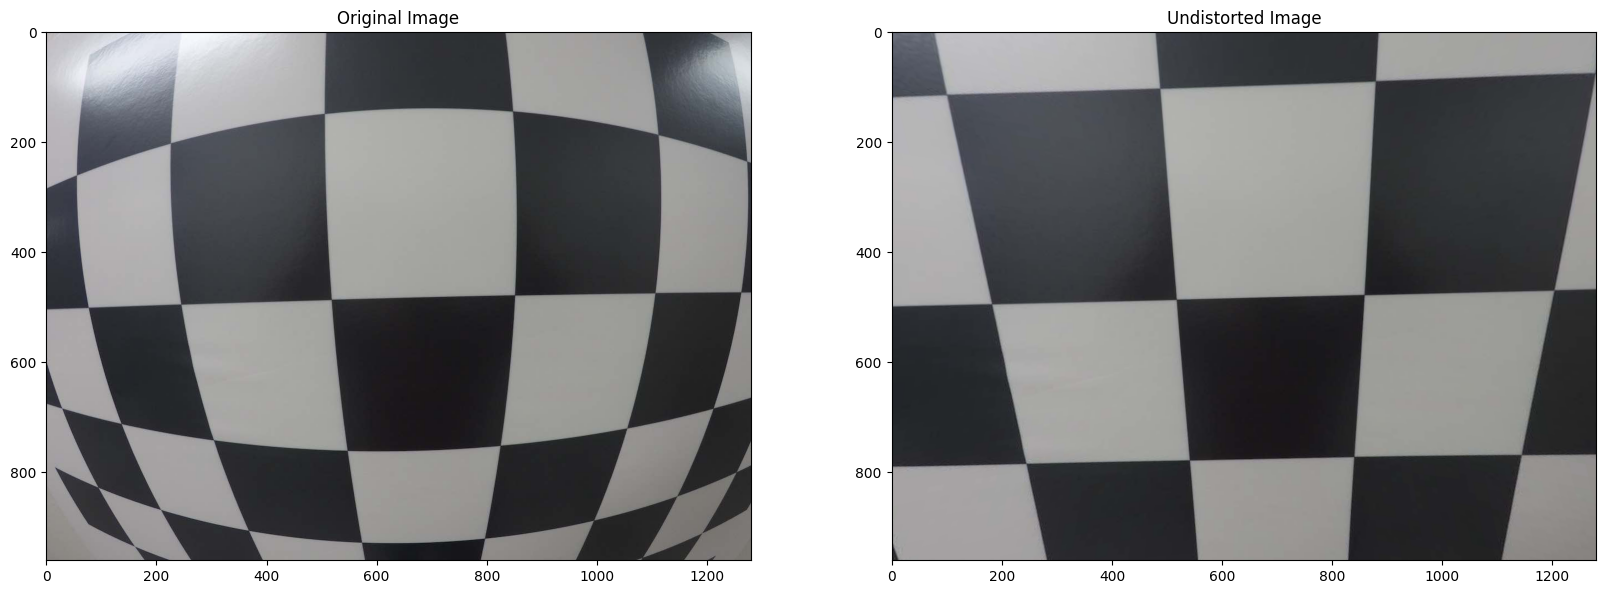

In [14]:
# Undistort the image using the camera matrix and distortion coefficients
undistorted = cv2.undistort(img, mtx, dist, None, mtx)

# Display original vs undistorted images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB))
ax2.set_title("Undistorted Image")

plt.show()


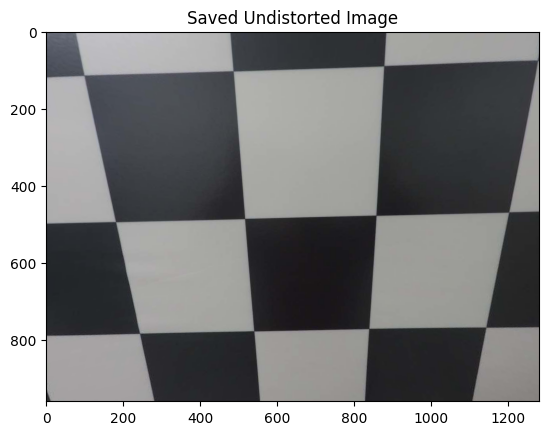

In [15]:
# Save the undistorted image
cv2.imwrite("undistorted_image.png", undistorted)

# Verify by reloading and displaying it
saved_img = cv2.imread("undistorted_image.png")

# Convert to RGB for correct display
plt.imshow(cv2.cvtColor(saved_img, cv2.COLOR_BGR2RGB))
plt.title("Saved Undistorted Image")
plt.show()
